## Importing packages and Dataset


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
iris = pd.read_csv('\\Users\\karthikeya\\Desktop\\UpX Academy Data Science\\MachineLearning\\k-Means Clustering\\iris.csv')
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Check number of null values in the data set

In [13]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Plotting some graphs for EDA

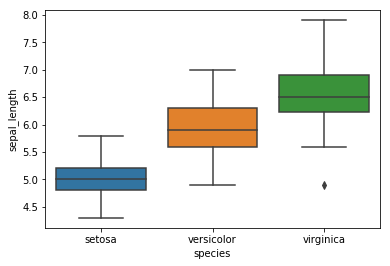

In [14]:
sns.boxplot(x='species', y='sepal_length', data=iris)

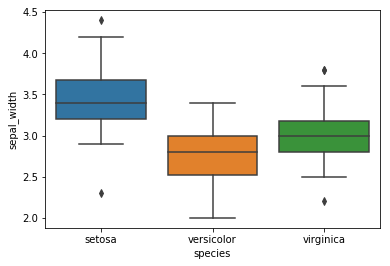

In [15]:
sns.boxplot(x='species', y='sepal_width', data=iris)

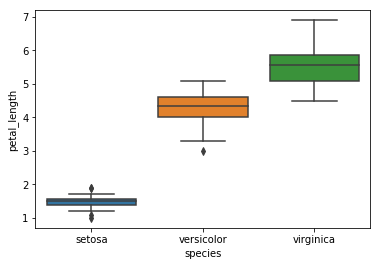

In [16]:
sns.boxplot(x='species', y='petal_length', data=iris)

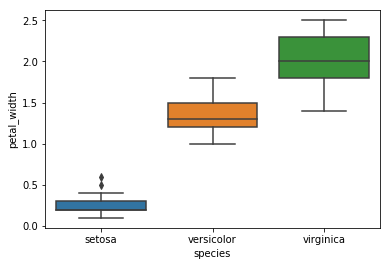

In [17]:
sns.boxplot(x='species', y='petal_width', data=iris)

Observations : Virginica has the highest sepal_length and petal_length. Seems to be the biggest flower. But setosa even though small seems to be having a big sepal width.

### Correlation plot

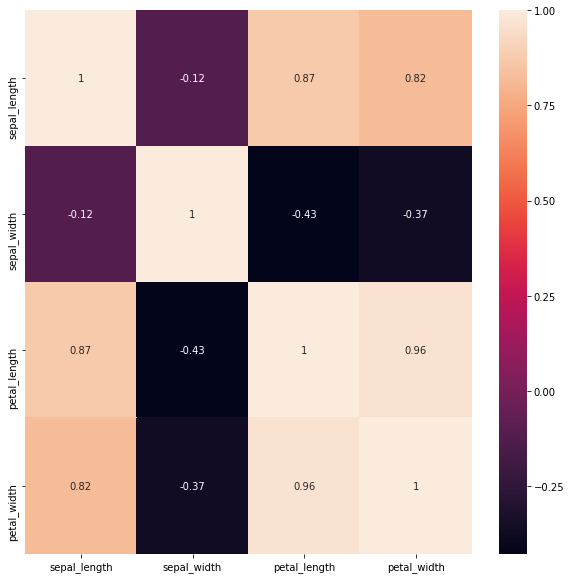

In [19]:
#Correlation relates to on ly numerical columns in the dataset
plt.figure(figsize=[10,10])
sns.heatmap(iris.corr(), annot=True)
plt.show()

Observations : Strong correlation between sepal_width & petal_width


Strong correlation between sepal_width & petal_length

Strong correlation between peatl_length & petal_width

### Histograms 

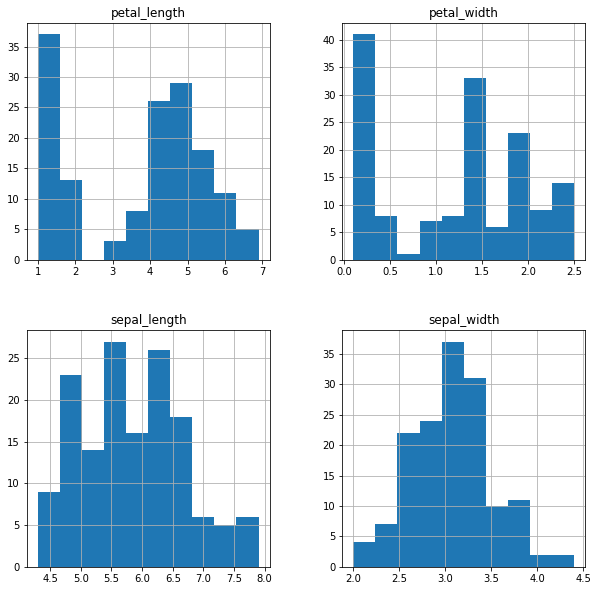

In [21]:
iris.hist(figsize=(10,10))
plt.show()

Variance of each column is less. No need of normalization.

### PairPlots

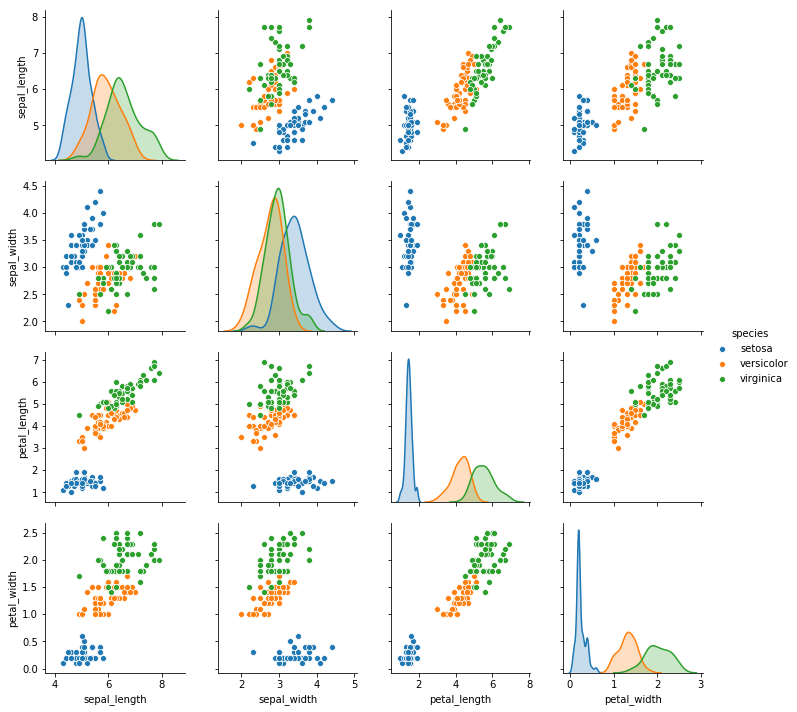

In [22]:
sns.pairplot(iris, hue='species')
plt.show()

It can be easily seen that setosa species of flower is easily distinguisable in all the pair plots.

Since in k-means we usually deal with numerical columns we will be dropping the species column from the dataset

In [23]:
iris.drop(['species'], inplace=True, axis=1)

In [25]:
#species column has been removed.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### Finding the number of clusters using the elbow method

In [30]:
#ssw is the sum of squares within error parameter

#Note : Since we are dealing with unspervised learning we will not use x and y for fitting the model. Hence we fit the whole data
#set to the model

ssw = []
cluster_range = range(1,5)

for i in cluster_range :
    model = KMeans(n_clusters=i, random_state=8)
    model.fit(iris)
    ssw.append(model.inertia_)

In [32]:
model.inertia_?
#These are the ssw values obtained from model to find the appropriate elbow point

In [33]:
ssw_df = pd.DataFrame({"No. of clusters": cluster_range, "ssw":ssw})

In [34]:
ssw_df.head()

,No. of clusters,ssw
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.282359


### Plot to find the elbow point

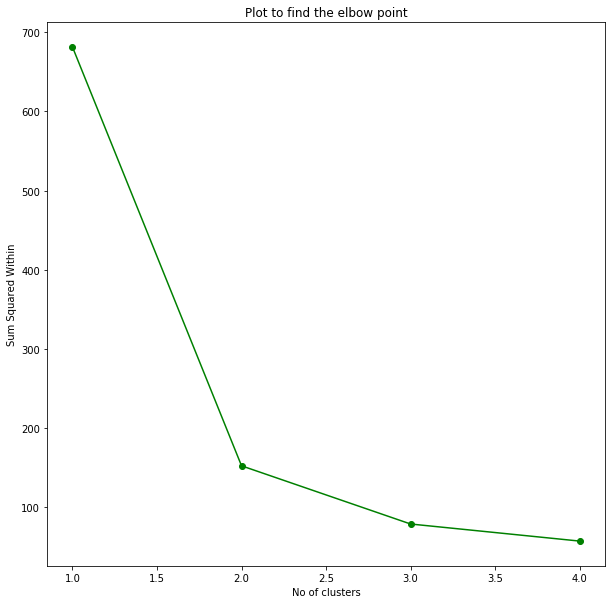

In [36]:
plt.figure(figsize=(10,10))
plt.plot(cluster_range, ssw, marker='o', color='#008000')
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Within')
plt.title('Plot to find the elbow point')
plt.show()

From graph its clear that elbow point is close to 3

### Building the k-Means model

In [37]:
kMeans = KMeans(n_clusters = 3, random_state=88)

### Fit the model

In [39]:
k_model = kMeans.fit(iris)
# No x and y since its unspervised

In [41]:
k_model.cluster_centers_
# There are 3 arrays for 3 clusters. Each has 4 centroid points

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Now we will be doing the grouping i.e clustering

In [43]:
clusters = k_model.labels_
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [44]:
#Add one more col to the dataframe 
iris['clusters'] = clusters

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,clusters
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,1


In [48]:
#Calculate the size of each clusters after grouping 
iris.groupby('clusters').size()
# or iris['clusters'].value_counts()
#Note : previously it was 50 each based on species.

clusters
0    50
1    62
2    38
dtype: int64

In [49]:
centroid_df = pd.DataFrame(k_model.cluster_centers_, columns=['sepal_length','sepal_width','petal_length','peatl_width'])

In [53]:
centroid_df.head()
#Clusters are seen horizontal wise. Row 0 is one cluster. Row 1 is 2nd and Row 2 is 3rd cluster

,sepal_length,sepal_width,petal_length,peatl_width
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


C:\Users\karthikeya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\karthikeya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


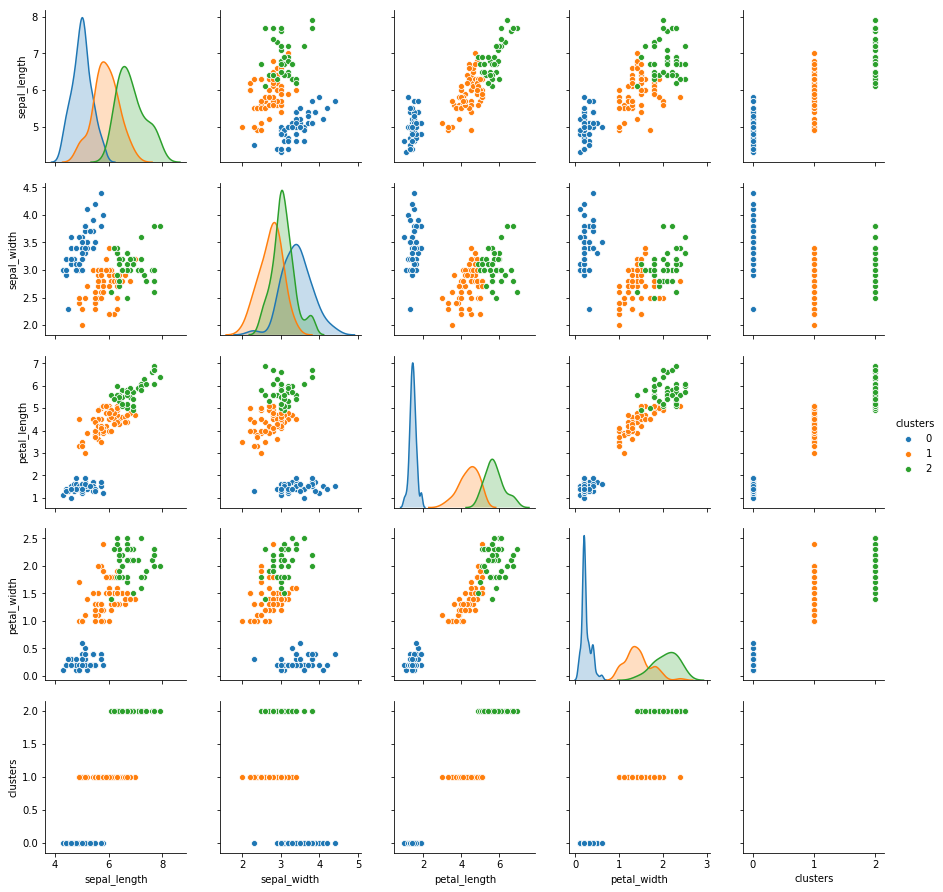

In [54]:
#Here for pair plotting we are using clusters for hue instead of species
sns.pairplot(iris, hue='clusters')

Cluster 0 is easily identifiable. Similar to setosa in species.